# Implementation of LSTM on GME hourly data

## 1. importing required packages

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

## 2. importing stock data using yahoo! finance API

<AxesSubplot:xlabel='Date'>

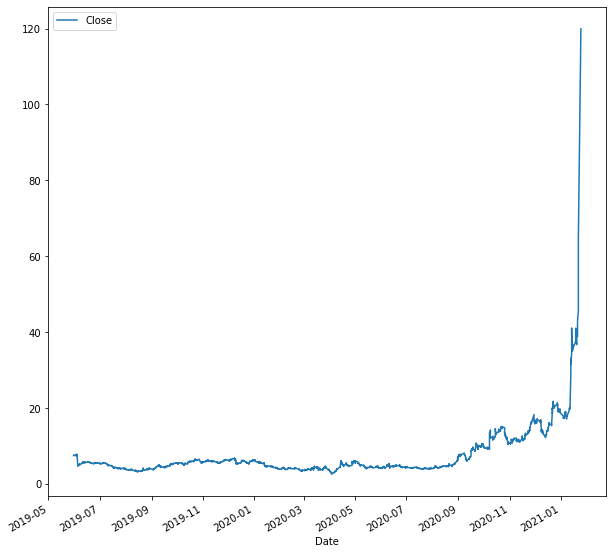

In [2]:
data = yf.download('GME', start = '2019-06-01', interval = '1h', end = '2021-01-26', progress = False)[['Close']]
data.head()
  
data.plot(figsize = (10, 10))

In [3]:
data.head()

,Close
Date,
2019-05-31,7.445
2019-05-31,7.495
2019-05-31,7.450
2019-05-31,7.470
2019-05-31,7.580


## 3. preparing dataset with 60:40 train-to-test ratio

In [4]:
prop_train = 0.6

cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*prop_train)]
scl = MinMaxScaler()

In [5]:
scl.fit(train.values.reshape(-1,1))
cl = scl.transform(cl.values.reshape(-1,1))

In [6]:
def processData(data, lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb), 0])
        Y.append(data[(i+lb), 0])
    return np.array(X), np.array(Y)
 
 
lb = 20
X, y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*prop_train)], X[int(X.shape[0]*prop_train):]
y_train,y_test = y[:int(y.shape[0]*prop_train)], y[int(y.shape[0]*prop_train):]
print(X.shape[0], y.shape[0])
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

2874 2874
1724 20
1150 20
1724
1150


## 4. train the model, look back window = 20

In [7]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/50
54/54 [==============================] - 6s 67ms/step - loss: 0.0487 - val_loss: 1.3846
Epoch 2/50
54/54 [==============================] - 2s 39ms/step - loss: 0.0070 - val_loss: 1.5350
Epoch 3/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0075 - val_loss: 1.2668
Epoch 4/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0055 - val_loss: 1.0481
Epoch 5/50
54/54 [==============================] - 2s 43ms/step - loss: 0.0042 - val_loss: 0.8918
Epoch 6/50
54/54 [==============================] - 2s 41ms/step - loss: 0.0034 - val_loss: 0.7897
Epoch 7/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0029 - val_loss: 0.7298
Epoch 8/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0027 - val_loss: 0.6963
Epoch 9/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0026 - val_loss: 0.6809
Epoch 10/50
54/54 [==============================] - 2s 40ms/step - loss: 0.0025 - val_loss: 0.6768
Epoch 11/

## 5. validation

Text(0.5, 1.0, 'Test Dataset')

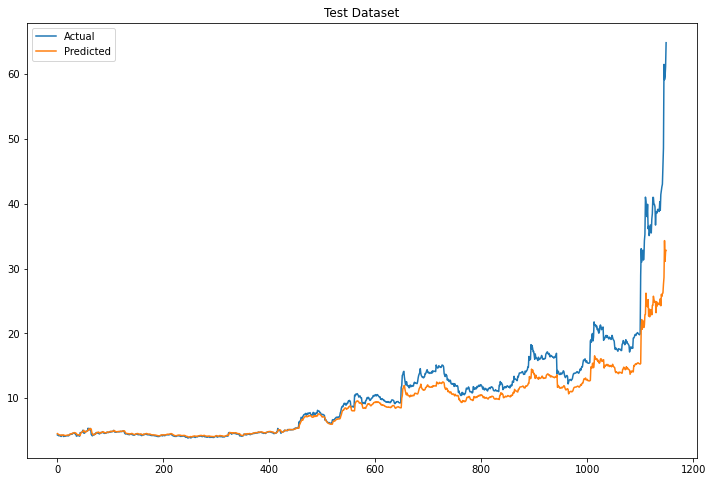

In [8]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

## 6. credit

### Source: 
> https://datamahadev.com/how-can-you-use-lstm-for-stock-market-prediction/<br>
> https://predictivehacks.com/predict-stock-prices-with-lstm/